In [2]:
# Initial imports
import pandas as pd
import os
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
from dotenv import load_dotenv
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/soma/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Reading housing prices data
file_path = Path("./Resources/housing_prices_month_clean.csv")
housing_price_df = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
housing_price_df.sort_index(inplace=True)
housing_price_df.head(10)

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,"Auburn, WA",188,81,118,447,107,38,10
2012-01-31,"Marysville, WA",180,78,93,285,65,12,-7
2012-01-31,"Brier, WA",540,7,5,26,147,71,38
2012-01-31,"Renton, WA",244,116,160,485,88,27,-14
2012-01-31,"Mercer Island, WA",863,12,40,105,88,3,-87
2012-01-31,"Tukwila, WA",122,15,17,60,98,-2,-29
2012-01-31,"Bothell, WA",314,117,155,339,74,-12,4
2012-01-31,"Redmond, WA",385,69,98,272,114,31,18
2012-01-31,"Mill Creek, WA",320,23,29,87,62,34,-35


In [4]:
housing_price_df['Region'] = housing_price_df['Region'].str.split(',', expand=True)[0]
housing_price_df.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,Auburn,188,81,118,447,107,38,10
2012-01-31,Marysville,180,78,93,285,65,12,-7
2012-01-31,Brier,540,7,5,26,147,71,38
2012-01-31,Renton,244,116,160,485,88,27,-14
2012-01-31,Mercer Island,863,12,40,105,88,3,-87


In [5]:
# Count nulls
housing_price_df_null = housing_price_df.isnull().sum()
housing_price_df_null

Region                0
Median Sale Price     0
Homes Sold            0
New Listings          0
Inventory             0
Days on Market        0
Days on Market MoM    0
Days on Market YoY    0
dtype: int64

In [6]:
housing_price_df['Inventory'] = housing_price_df['Inventory'].str.replace(",", "")
housing_price_df['Inventory'].head() 

Date
2012-01-31    447
2012-01-31    285
2012-01-31     26
2012-01-31    485
2012-01-31    105
Name: Inventory, dtype: object

In [7]:
#Convert `Close` from `object` to `float`.
housing_price_df['Inventory'] = housing_price_df['Inventory'].astype('int')
housing_price_df['Inventory']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold            object
New Listings          object
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [8]:
housing_price_df['Homes Sold'] = housing_price_df['Homes Sold'].str.replace(",", "")
housing_price_df['Homes Sold'] = housing_price_df['Homes Sold'].astype('int')
housing_price_df['Homes Sold']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold             int64
New Listings          object
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [9]:
housing_price_df['New Listings'] = housing_price_df['New Listings'].str.replace(",", "")
housing_price_df['New Listings'] = housing_price_df['New Listings'].astype('int')
housing_price_df['New Listings']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold             int64
New Listings           int64
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [10]:
housing_price_df.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,Auburn,188,81,118,447,107,38,10
2012-01-31,Marysville,180,78,93,285,65,12,-7
2012-01-31,Brier,540,7,5,26,147,71,38
2012-01-31,Renton,244,116,160,485,88,27,-14
2012-01-31,Mercer Island,863,12,40,105,88,3,-87


In [12]:
housing_price_df.to_csv("housing_price_mnth_clean.csv", header=True)

In [9]:
housing_price_df.corr()

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Median Sale Price,1.000000,-0.023168,-0.025732,-0.076468,-0.294333,0.015330,0.133827
Homes Sold,-0.023168,1.000000,0.971352,0.921674,-0.082790,0.002838,0.017621
New Listings,-0.025732,0.971352,1.000000,0.916346,-0.082074,-0.011253,0.016426
Inventory,-0.076468,0.921674,0.916346,1.000000,0.000695,0.004472,0.009068
Days on Market,-0.294333,-0.082790,-0.082074,0.000695,1.000000,0.338288,0.195358
Days on Market MoM,0.015330,0.002838,-0.011253,0.004472,0.338288,1.000000,0.350020
Days on Market YoY,0.133827,0.017621,0.016426,0.009068,0.195358,0.350020,1.000000


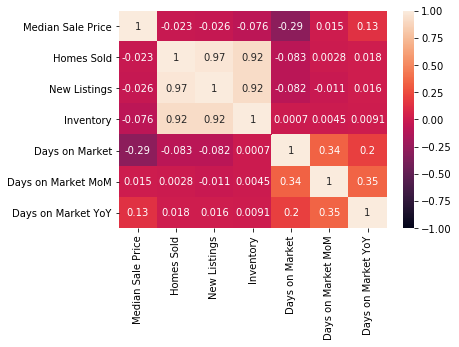

In [10]:
sns.heatmap(housing_price_df.corr(), vmin=-1, vmax=1, annot=True)

Asset Correlation

In [33]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [34]:
# Load the asset price data
file_path = Path("Resources/Asset_Prices_Month.csv") 
asset_data_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
asset_data_df.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


In [37]:
# Read the housing price aggregate data, set the `Date` as the index
file_path = Path("Resources/housing_prices_month_aggregate_clean.csv") 
housing_data_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_data_df.head()

,Median Sale Price
Date,
2012-02-29,297736.8421
2012-03-31,300131.5789
2012-04-30,311921.0526
2012-05-31,324657.8947
2012-06-30,318684.2105


In [38]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Date`)
combined_df = pd.concat([asset_data_df, housing_data_df], axis='columns', join='inner')
combined_df.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08,297736.8421
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35,300131.5789
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12,311921.0526
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67,324657.8947
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76,318684.2105


In [39]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change().dropna()
daily_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2013-11-30,0.081285,0.028736,0.076814,4.450260,-0.055585,0.052342,0.034405
2013-12-31,0.013134,0.016685,-0.018883,-0.303446,-0.038864,0.036649,-0.048584
2014-01-31,-0.100554,-0.082277,0.011494,0.130777,0.031533,-0.088384,0.037860
2014-02-28,0.009507,0.029219,0.012421,-0.325851,0.065817,-0.005540,0.040450
2014-03-31,-0.071058,-0.026606,0.069956,-0.167128,-0.028530,-0.008357,0.041988


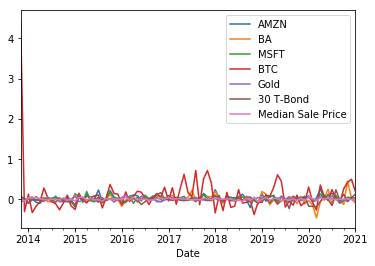

In [44]:
daily_returns.plot.line()

In [45]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Median Sale Price    0.447330
Gold                 0.614827
MSFT                 0.925340
30 T-Bond            1.251342
AMZN                 1.333460
BA                   1.688187
BTC                  8.375357
dtype: float64

In [41]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = combined_df.corr()
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.590124,0.982338,0.830743,0.482097,-0.699015,0.925388
BA,0.590124,1.000000,0.542075,0.411225,-0.137401,-0.116423,0.731449
MSFT,0.982338,0.542075,1.000000,0.833201,0.522869,-0.751674,0.900481
BTC,0.830743,0.411225,0.833201,1.000000,0.740757,-0.545785,0.781356
Gold,0.482097,-0.137401,0.522869,0.740757,1.000000,-0.607293,0.212930
30 T-Bond,-0.699015,-0.116423,-0.751674,-0.545785,-0.607293,1.000000,-0.615141
Median Sale Price,0.925388,0.731449,0.900481,0.781356,0.212930,-0.615141,1.000000


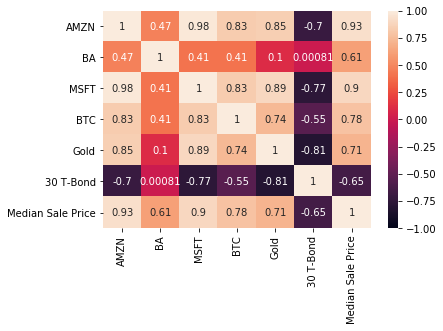

In [31]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)